<a href="https://colab.research.google.com/github/UznetDev/Data-science-home-work/blob/main/04_Noy_2024_home_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install and import

In [1]:
!pip install shap
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=0c2081e010d06371119977776e214eb92f1ecc417887f302364df1cecdb0737c
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import shap
import lime
import matplotlib.pyplot as plt

## Load data

In [3]:
df = pd.read_csv('train.csv').dropna()
df.head()

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,104.0,12.5,0.25,0.25,0.25,0.75,69.7,42.1,58.2,50.2,24.3,41.2,16.00,0.26,0.477941,0.423927,34.043022,6079.08526
1,1,764.0,25.0,0.00,0.00,0.00,0.00,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.334594,0.354415,27.735098,2946.92602
2,2,621.0,25.0,0.50,0.25,0.75,0.63,86.0,52.0,71.9,62.0,30.0,50.8,34.00,0.56,0.468192,0.417915,34.838815,5323.30034
3,3,499.0,25.0,0.50,0.25,0.38,0.75,69.7,42.1,58.2,50.2,24.3,41.2,24.00,0.39,0.500558,0.427431,35.134955,6157.05484
4,4,439.0,12.5,0.25,0.38,0.50,0.75,77.4,46.8,64.7,55.8,27.0,45.8,24.00,0.39,0.520181,0.464067,37.029180,6992.82314


## Split data

In [4]:
X = df.drop('yield', axis=1)
y = df['yield']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train RandomForest model

In [5]:
rf_model = RandomForestRegressor(n_estimators=50,
                                 max_depth=5,
                                 random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=50, random_state=42)

## Shap

### SHAP Analysis

In [6]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

### Summary Plot: Global Feature Importance

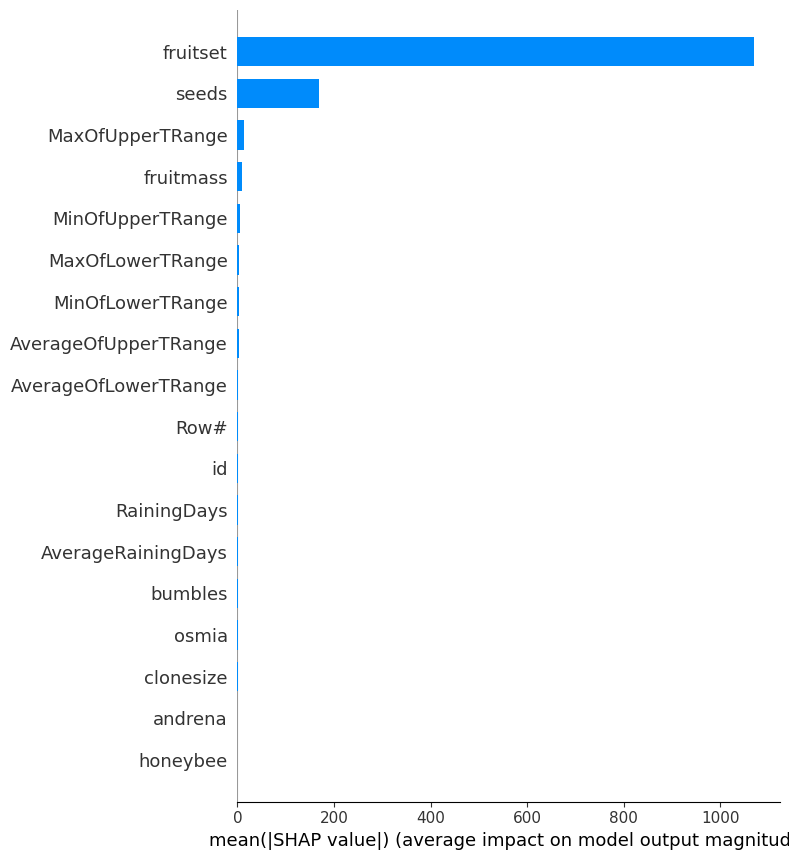

In [7]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

### Summary Plot: Distribution of Feature Effects

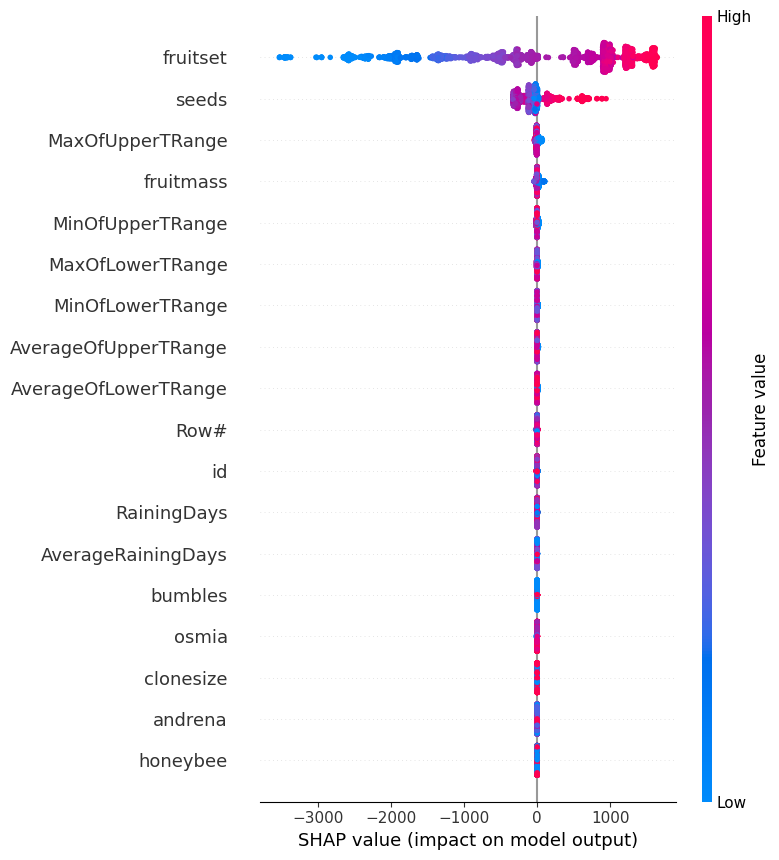

In [8]:
shap.summary_plot(shap_values, X_test)

### Dependence Plot for a single feature `seeds`

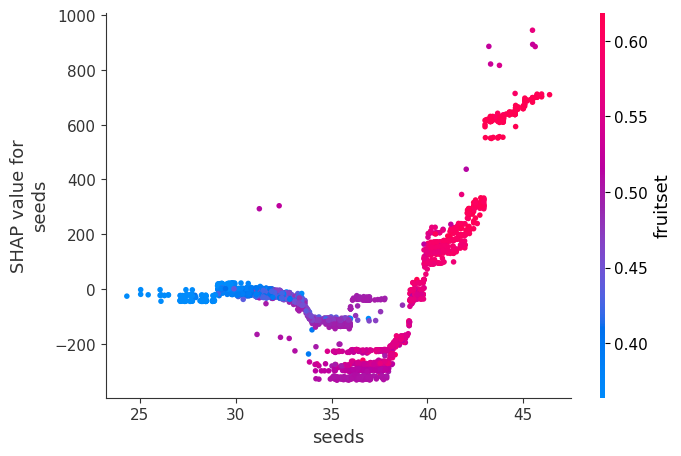

In [9]:
shap.dependence_plot("seeds", shap_values, X_test)

### Force & Waterfall Plot for a single instance

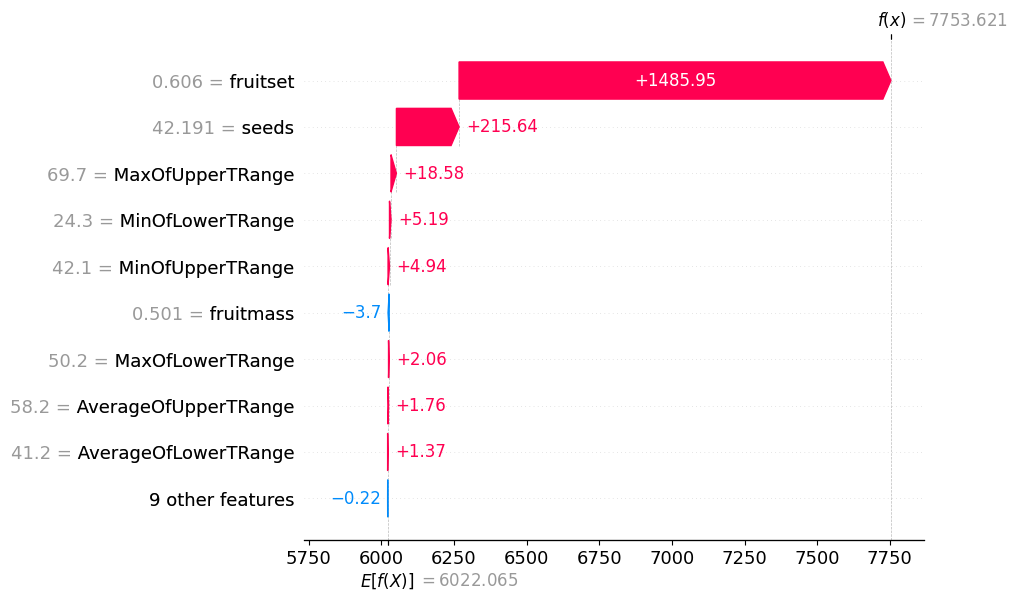

In [15]:
shap.waterfall_plot(shap.Explanation(values=shap_values[0,:],
                                     base_values=explainer.expected_value,
                                     data=X_test.iloc[0,:]))

In [10]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

## Lime

### Initialize Explainer

In [11]:
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.values,
    mode="regression",
    training_labels=y_train.values,
    feature_names=X_train.columns.tolist(),
    discretize_continuous=True
)

### Select simple to explain

In [12]:
exp = lime_explainer.explain_instance(X_test.values[0], rf_model.predict)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Explanation

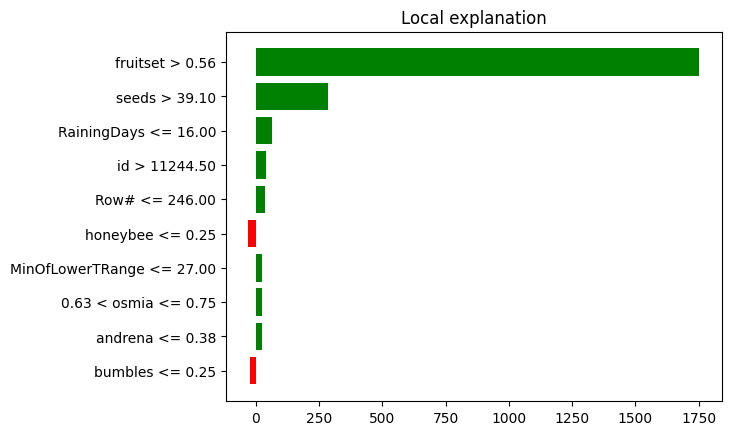

In [13]:
exp.show_in_notebook(show_table=True)
exp.as_pyplot_figure()
plt.show()